# Nhập học học máy - Final

**Lớp**: 22KHMT1

**MSSV**: 22127154

**Họ và tên**: Nguyễn Gia Huy

**Link Google Drive**: [Link](https://drive.google.com/drive/folders/1UXwtj9SZLiOch9ScBImjy4SiJhZ9e5KZ?usp=sharing)

**Link Github**: [Link](https://github.com/HZeroxium/Final_Machine_Learning)


## Lưu ý

Đoạn code bên dưới dùng để tùy chỉnh số worker (Logical processors) của máy tính để hỗ trợ đa luồng trong quá trình huấn luyện mô hình. Thầy có thể tùy chỉnh số worker phù hợp với máy tính của mình để tránh quá tải CPU.

Nhằm đảm bảo về tốc độ khi thầy chạy file, ở phần ma trận các siêu tham số em sẽ giảm số lượng siêu tham số để giảm thời gian huấn luyện.


In [1]:
import os

# Kiểm tra số lượng CPU
print(os.cpu_count())

20


In [2]:
# Số lượng worker tối đa
MAX_WORKERS = 18  # Số lượng worker tối đa (Lưu ý: không vượt quá số lõi CPU)

# 1. Khám phá và tiền xử lí dữ liệu

## 1.1. Đọc và mô tả dữ liệu


In [3]:
from utils import exploring, preprocessing
import numpy as np

# Main Workflow
train_data, test_data = exploring.load_data("./data/train.csv", "./data/test.csv")

# Khám phá dữ liệu
exploring.summarize_data(train_data, "Tập Huấn Luyện")
exploring.summarize_data(test_data, "Tập Kiểm Tra")

Thông tin Tập Huấn Luyện:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-nu

## 1.2 Trực quan hóa phân phối nhãn


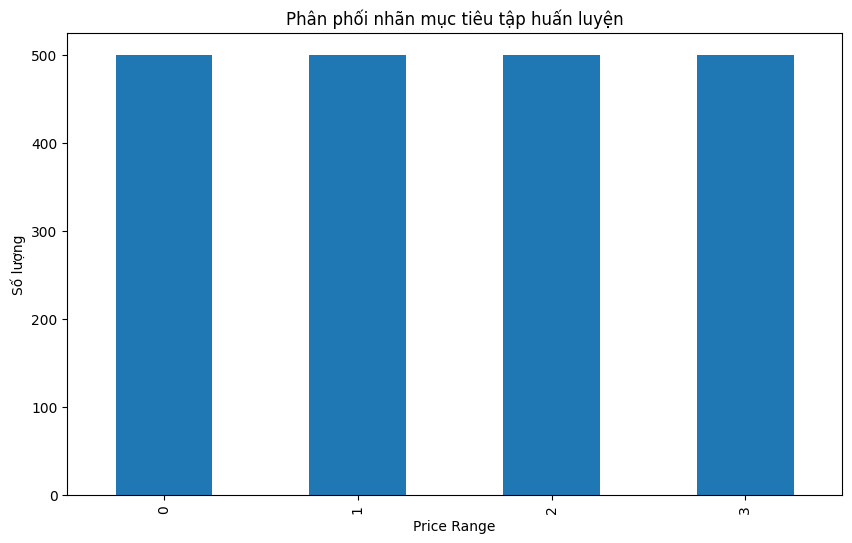

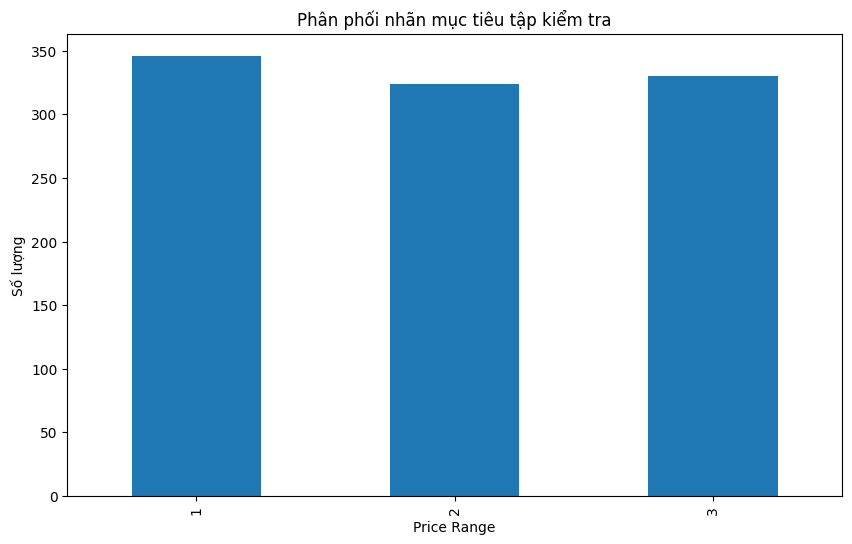

In [4]:
# Trực quan hóa
exploring.visualize_distribution(
    train_data,
    "price_range",
    "Phân phối nhãn mục tiêu tập huấn luyện",
    "Price Range",
    "Số lượng",
)
exploring.visualize_distribution(
    test_data,
    "price_range",
    "Phân phối nhãn mục tiêu tập kiểm tra",
    "Price Range",
    "Số lượng",
)

## 1.3 Trực quan hóa ma trận tương quan


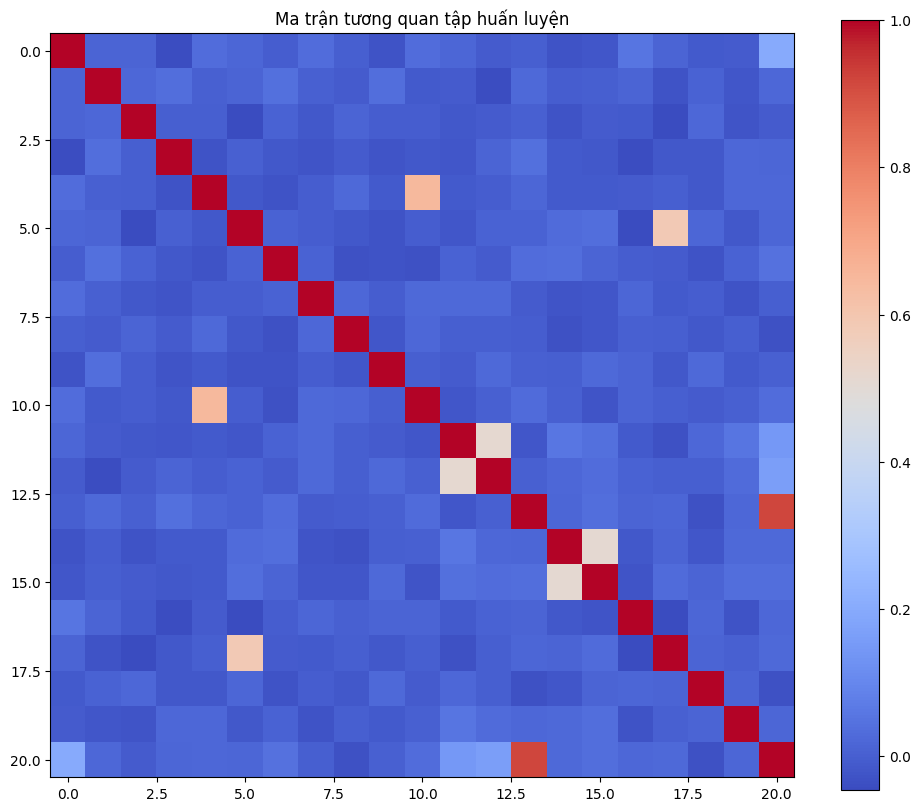

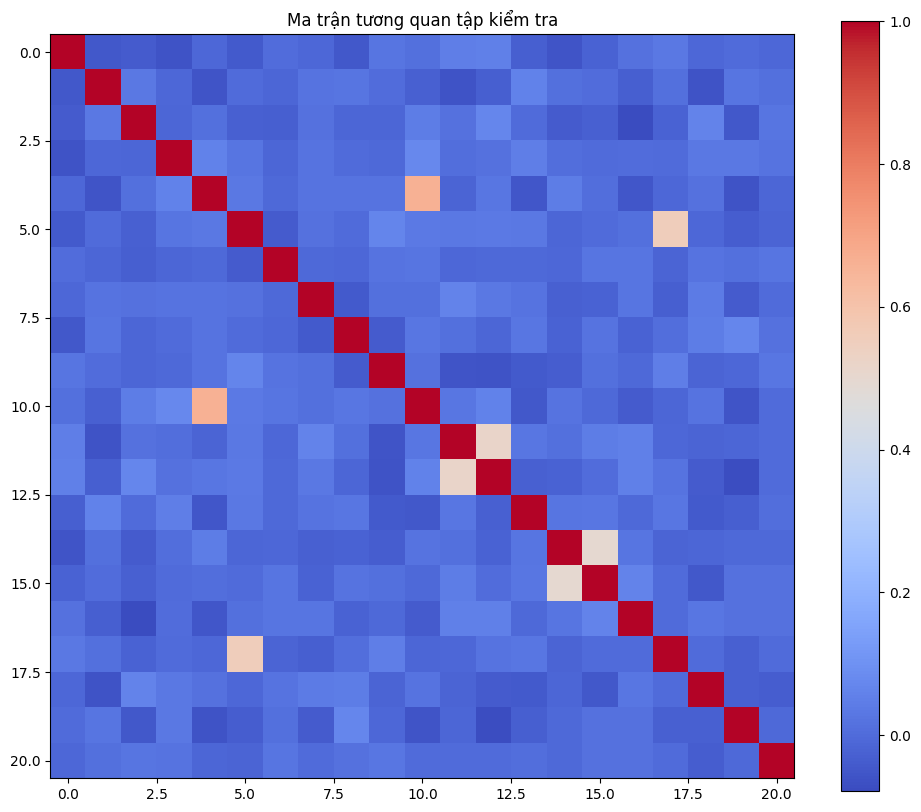

In [5]:
# Ma trận tương quan
exploring.plot_correlation_matrix(train_data, "Ma trận tương quan tập huấn luyện")
exploring.plot_correlation_matrix(test_data, "Ma trận tương quan tập kiểm tra")

## 1.4. Trực quan hóa phân phối của các biến độc lập


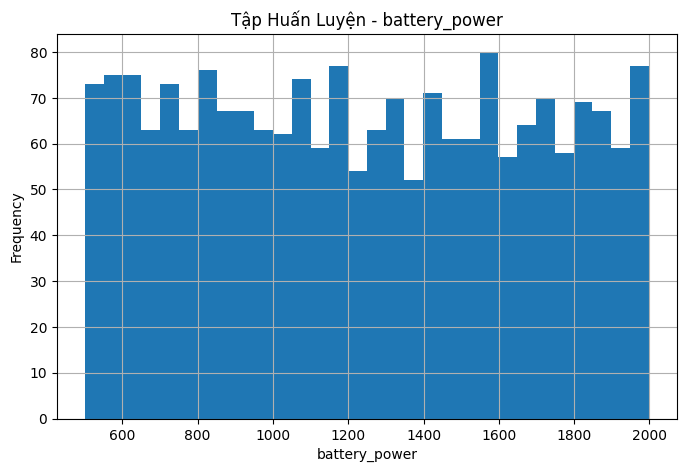

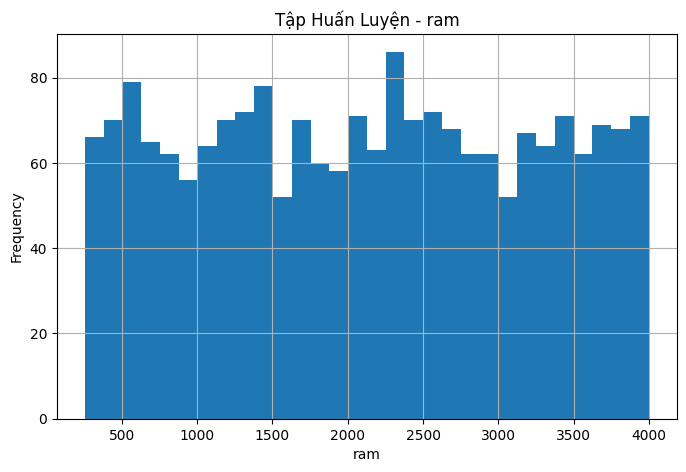

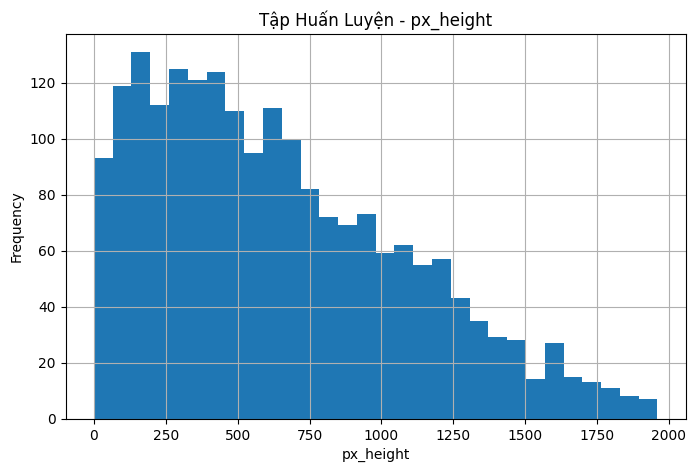

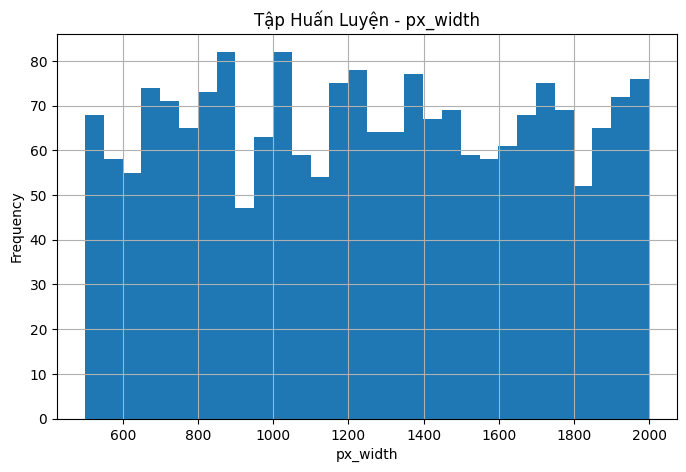

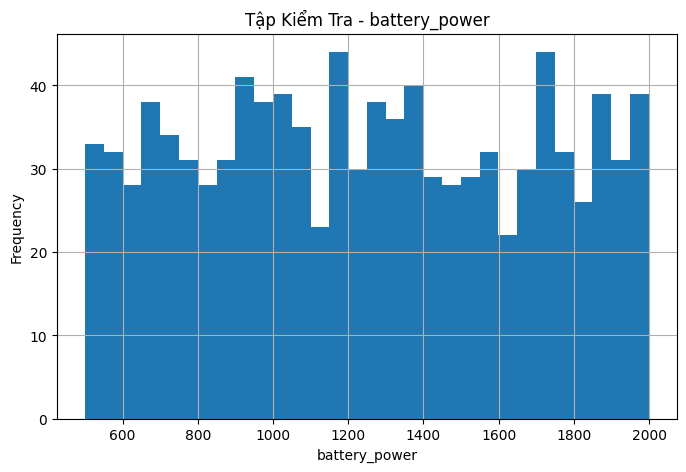

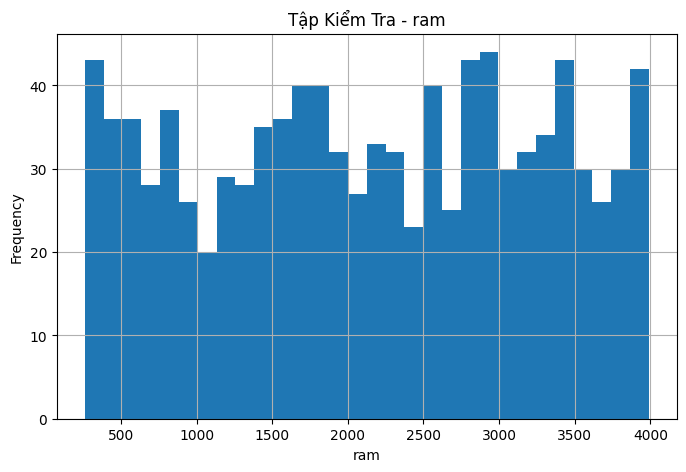

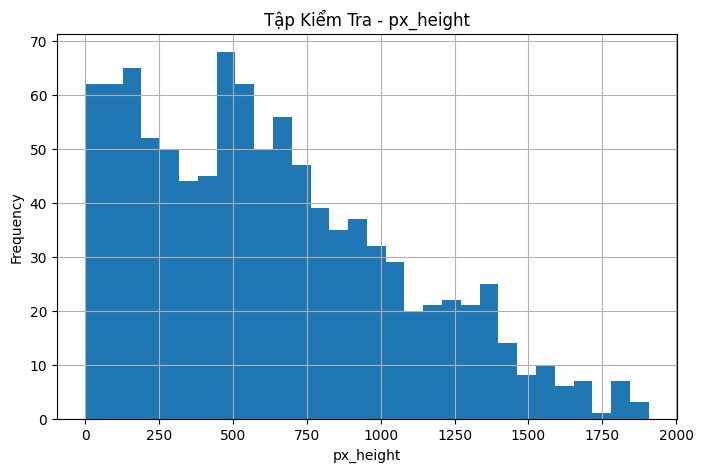

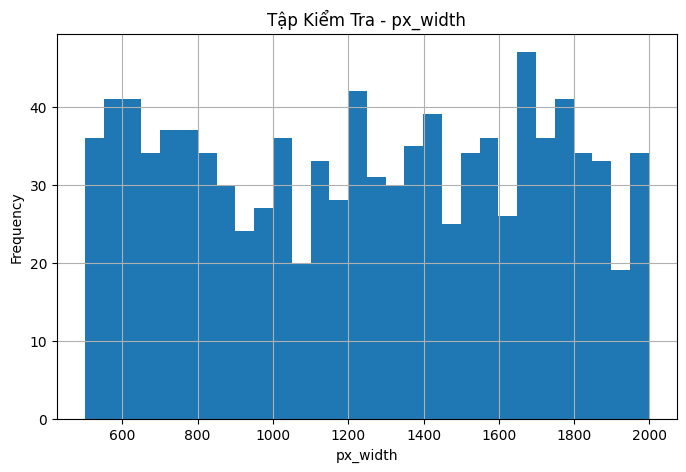

In [6]:
continuous_features = ["battery_power", "ram", "px_height", "px_width"]
exploring.visualize_continuous_features(
    train_data, continuous_features, "Tập Huấn Luyện"
)
exploring.visualize_continuous_features(test_data, continuous_features, "Tập Kiểm Tra")

## 1.5. Xử lí loại bỏ các đặc trưng có tương quan cao


In [7]:
high_corr_features = preprocessing.identify_high_correlation(
    train_data.drop(columns=["price_range"])
)
train_data.drop(columns=high_corr_features, inplace=True)
test_data.drop(columns=high_corr_features, inplace=True)

Các đặc trưng có tương quan cao (>0.9): []


## 1.6. Xử lí các giá trị thiếu


In [8]:
preprocessing.handle_missing_values(train_data)
preprocessing.handle_missing_values(test_data)

Không có giá trị bị thiếu.
Không có giá trị bị thiếu.


## 1.7. Feature Engineering tạo thêm các đặc trưng mới

`aspect_ratio` = `ps_height` / `ps_width`

`power_to_weight` = `battery_power` / `mobile_wt`


In [9]:
# Tạo đặc trưng mới
train_data, test_data = preprocessing.feature_engineering(train_data, test_data)

## 1.8 Chuẩn hóa dữ liệu (Normalization)


In [10]:
# # Chuẩn hóa dữ liệu liên tục
continuous_features = [
    "battery_power",
    "clock_speed",
    "fc",
    "int_memory",
    "m_dep",
    "mobile_wt",
    "px_height",
    "px_width",
    "ram",
    "sc_h",
    "sc_w",
    "talk_time",
    "aspect_ratio",
    "power_to_weight",
]

train_data[continuous_features], scaling_params = preprocessing.fit_transform(
    train_data[continuous_features].copy(), continuous_features
)
test_data[continuous_features] = preprocessing.transform(
    test_data[continuous_features].copy(), continuous_features, scaling_params
)

In [11]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,aspect_ratio,power_to_weight
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.555556,0.900000,2,...,0.612774,0.285714,0.388889,0.944444,0,0,1,1,0.026474,0.087906
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.666667,0.466667,3,...,0.634687,0.857143,0.166667,0.277778,1,1,0,2,0.455561,0.224009
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.888889,0.541667,5,...,0.627205,0.428571,0.111111,0.388889,1,1,0,2,0.736547,0.061124
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.777778,0.425000,6,...,0.671566,0.785714,0.444444,0.500000,1,0,0,2,0.681344,0.097609
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.555556,0.508333,2,...,0.308658,0.214286,0.111111,0.722222,1,1,0,1,0.997421,0.467019


## 1.9. Categotical Encoding


In [12]:
# Mã hóa dữ liệu phân loại
categorical_features = [
    # "fc",
    # "int_memory",
    # "m_dep",
    "n_cores",
    # "pc",
    # "sc_h",
    # "sc_w",
    # "talk_time",
]
train_data, test_data = preprocessing.categorical_encoding(
    train_data, test_data, categorical_features
)

# # Drop all rows in train_data where price_range = 0
# train_data = train_data[train_data["price_range"] != 0]

# Kiểm tra tính nhất quán của dữ liệu
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (2000, 29)
Test shape: (1000, 29)


In [13]:
# Kiểm tra lại dữ liệu
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,...,price_range,aspect_ratio,power_to_weight,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.555556,0.900000,2,...,1,0.026474,0.087906,True,False,False,False,False,False,False
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.666667,0.466667,6,...,2,0.455561,0.224009,False,True,False,False,False,False,False
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.888889,0.541667,6,...,2,0.736547,0.061124,False,False,False,True,False,False,False
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.777778,0.425000,9,...,2,0.681344,0.097609,False,False,False,False,True,False,False
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.555556,0.508333,14,...,1,0.997421,0.467019,True,False,False,False,False,False,False


In [14]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,...,price_range,aspect_ratio,power_to_weight,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8
0,0.362057,1,0.52,1,0.736842,0,0.048387,0.000000,0.941667,16,...,3,0.160172,0.129493,False,True,False,False,False,False,False
1,0.227121,1,0.00,1,0.210526,1,0.951613,0.777778,0.925000,12,...,1,0.871108,0.084509,False,False,False,True,False,False,False
2,0.872411,1,0.92,0,0.052632,0,0.403226,0.888889,0.883333,4,...,1,0.930395,0.323221,False,True,False,False,False,False,False
3,0.698063,0,0.00,1,0.947368,1,0.370968,0.444444,0.133333,20,...,1,0.168501,0.610341,False,False,False,False,False,False,True
4,0.623246,0,0.36,0,0.578947,1,0.758065,0.444444,0.233333,18,...,3,0.925360,0.483326,False,False,False,False,True,False,False


## 1.10. Lưu dữ liệu đã tiền xử lí


In [15]:
# Save to file
train_data.to_csv("./data/train_processed.csv", index=False)
test_data.to_csv("./data/test_processed.csv", index=False)

## 1.11. Chia dữ liệu thành tập huấn luyện và tập validation


In [16]:
train_data, val_data = preprocessing.train_test_split(
    train_data, test_size=0.2, random_state=42
)

In [17]:
X_train = train_data.drop(columns=["price_range"]).values
y_train = train_data["price_range"].values
X_val = val_data.drop(columns=["price_range"]).values
y_val = val_data["price_range"].values
X_test = test_data.drop(columns=["price_range"]).values
y_test = test_data["price_range"].values

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

n_features = X_train.shape[1]

print("Dữ liệu đã tiền xử lý sẵn sàng!")

X_train shape: (1600, 28)
y_train shape: (1600,)
X_val shape: (400, 28)
y_val shape: (400,)
X_test shape: (1000, 28)
y_test shape: (1000,)
Dữ liệu đã tiền xử lý sẵn sàng!


# 2. Xây dựng mô hình

## 2.1. Import thư viện


In [18]:
# Tìm kiếm mô hình tốt nhất
from models.tuning import lightgbm_tuning, random_forest_tuning, neural_network_tuning
import time

## 2.2. Huấn luyện và đánh giá mô hình Random Forest


In [19]:
rf_param_grid = {
    "n_estimators": [
        10,
        20,
        # 30,
        # 40,
        # 50,
        # 100,
    ],
    "max_depth": [
        # 3,
        5,
        7,
        # 9,
        None,
    ],  # None = không giới hạn độ sâu
    "min_samples_split": [
        2,
        # 5,
        # 10,
        # None, for decoration
    ],
    "min_samples_leaf": [
        1,
        2,
        # 4,
        # None, for decoration
    ],
}

n_rf_hyperparams = np.prod(
    [len(v) for v in rf_param_grid.values()]
)  # Số lượng hyperparams

In [20]:
# Lấy thời gian hiện tại và tạo chuỗi thời gian
current_time = time.strftime("%Y%m%d_%H%M%S")
criterion = "entropy"
# Đặt tên file đầu ra với chuỗi thời gian
rf_output_file = f"./output/{current_time}_random_forest_best_params_{n_rf_hyperparams}_{n_features}_{criterion}.csv"

# Tìm mô hình tốt nhất dựa trên validation set
best_rf_model, best_rf_params, best_rf_val_acc = (
    random_forest_tuning.random_forest_hyperparameter_tuning(
        X_train,
        y_train,
        X_val,
        y_val,
        param_grid=rf_param_grid,
        output_file=rf_output_file,
        max_workers=MAX_WORKERS,
    )
)

print(f"==========> Best validation accuracy: {best_rf_val_acc:.4f}")
print(f"==========> Best parameters: {best_rf_params}")

# Đánh giá trên tập test
test_rf_accuracy = best_rf_model.evaluate(X_test, y_test)
print(f"==========> Test accuracy: {test_rf_accuracy:.4f}")

2025-01-05 22:32:35,881 - INFO - Using 18 workers for hyperparameter tuning
2025-01-05 22:32:35,946 - INFO - Total tasks to complete: 12
2025-01-05 22:33:05,093 - INFO - Task 1/12 completed with: n_estimators=10, max_depth=5, min_samples_split=2, min_samples_leaf=1, train_acc=0.8931, val_acc=0.8200, start_time=2025-01-05 22:32:36, end_time=2025-01-05 22:33:05, training_time=28.91s
2025-01-05 22:33:05,455 - INFO - Task 2/12 completed with: n_estimators=10, max_depth=5, min_samples_split=2, min_samples_leaf=2, train_acc=0.8919, val_acc=0.8200, start_time=2025-01-05 22:32:36, end_time=2025-01-05 22:33:05, training_time=29.27s
2025-01-05 22:33:14,059 - INFO - Task 3/12 completed with: n_estimators=10, max_depth=7, min_samples_split=2, min_samples_leaf=1, train_acc=0.9675, val_acc=0.8650, start_time=2025-01-05 22:32:36, end_time=2025-01-05 22:33:14, training_time=37.88s
2025-01-05 22:33:16,566 - INFO - Task 4/12 completed with: n_estimators=10, max_depth=7, min_samples_split=2, min_samples_

==========> Best validation accuracy: 0.8950
==========> Best parameters: {'n_estimators': 20, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2}
==========> Test accuracy: 0.2370


In [22]:
from models.random_forest import RandomForestModel

# Load model
loaded_rf_model = RandomForestModel()
loaded_rf_model.load_model_weights("weights_random_forest_best.json")

# Đánh giá trên tập test
test_rf_loaded_accuracy = loaded_rf_model.evaluate(X_test, y_test)
print(f"==========> Test accuracy: {test_rf_loaded_accuracy:.4f}")

==========> Test accuracy: 0.2370


## 2.3. Huấn luyện và đánh giá mô hình LightGBM


In [23]:
lightgbm_param_grid = {
    "n_estimators": [
        10,
        # 20,
        # 30,
        # 40,
        50,
    ],
    "learning_rate": [
        # 0.01,
        # 0.05,
        0.1,
    ],
    "max_depth": [
        3,
        # 5,
        # 7,
        # 9,
        # None,
    ],
    "lambda_l1": [
        0.0,
        # 0.001,
        0.01,
        # 0.1,
        # 1.0
    ],
    "lambda_l2": [
        0.0,
        # 0.001,
        0.01,
        # 0.1,
        # 1.0
    ],
}

n_lightgbm_params = np.prod([len(v) for v in lightgbm_param_grid.values()])

In [24]:
# Lấy thời gian hiện tại và tạo chuỗi thời gian
current_time = time.strftime("%Y%m%d_%H%M%S")

# Đặt tên file đầu ra với chuỗi thời gian
lightgbm_output_file = (
    f"./output/{current_time}_lightgbm_best_params_{n_lightgbm_params}_{n_features}.csv"
)

best_lightgbm_model, best_lightgbm_params, best_lightgbm_val_acc = (
    lightgbm_tuning.lightgbm_hyperparameter_tuning(
        X_train,
        y_train,
        X_val,
        y_val,
        param_grid=lightgbm_param_grid,
        output_file=lightgbm_output_file,
        max_workers=MAX_WORKERS,
    )
)

print(f"==========> Best validation accuracy: {best_lightgbm_val_acc:.4f}")
print(f"==========> Best parameters: {best_lightgbm_params}")

# Đánh giá trên tập test
test_lightgbm_accuracy = best_lightgbm_model.evaluate(X_test, y_test)
print(f"==========> Test accuracy: {test_lightgbm_accuracy:.4f}")

2025-01-05 22:35:19,496 - INFO - Using 18 workers for hyperparameter tuning
2025-01-05 22:35:19,531 - INFO - Total tasks to complete: 8
2025-01-05 22:35:37,168 - INFO - Task 1/8 completed with: n_estimators=10, learning_rate=0.1, max_depth=3, lambda_l1=0.01, lambda_l2=0.01, train_acc=0.5050, val_acc=0.4850, start_time=2025-01-05 22:35:19, end_time=2025-01-05 22:35:37, training_time=17.43s
2025-01-05 22:35:37,613 - INFO - Task 2/8 completed with: n_estimators=10, learning_rate=0.1, max_depth=3, lambda_l1=0.0, lambda_l2=0.01, train_acc=0.5050, val_acc=0.4850, start_time=2025-01-05 22:35:19, end_time=2025-01-05 22:35:37, training_time=17.87s
2025-01-05 22:35:37,735 - INFO - Task 3/8 completed with: n_estimators=10, learning_rate=0.1, max_depth=3, lambda_l1=0.0, lambda_l2=0.0, train_acc=0.5056, val_acc=0.4850, start_time=2025-01-05 22:35:19, end_time=2025-01-05 22:35:37, training_time=17.99s
2025-01-05 22:35:37,883 - INFO - Task 4/8 completed with: n_estimators=10, learning_rate=0.1, max_d

==========> Best validation accuracy: 0.9100
==========> Best parameters: {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3, 'lambda_l1': 0.0, 'lambda_l2': 0.0}
==========> Test accuracy: 0.2370


In [25]:
from models.lightgbm import LightGBMModel

# Load model
loaded_lightgbm_model = LightGBMModel()
loaded_lightgbm_model.load_model_weights("weights_lightgbm_best.json")

# Đánh giá trên tập test
test_lightgbm_loaded_accuracy = loaded_lightgbm_model.evaluate(X_test, y_test)
print(f"==========> Test accuracy: {test_lightgbm_loaded_accuracy:.4f}")

==========> Test accuracy: 0.2370


## 2.4. Huấn luyện và đánh giá mô hình Neural Network

Sau khi chạy thử nghiệm mô hình Neural Network nhiều lần, em nhận thấy mô hình này không phù hợp với dữ liệu của bài toán. Do đó, em sẽ không sử dụng mô hình Neural Network trong bài làm này. (ngay cả khi em thử bỏ các đặc trưng dạng binary, mô hình vẫn không hiệu quả)

Thầy có thể tham khảo kết quả của quá trình huấn luyện tại 2 sheet trong trang [Google Sheet này](https://docs.google.com/spreadsheets/d/1FCYKaQQGHqZ_cgiAy3avVQ2tUBjgDqjQdChD2TFzslw/edit?usp=sharing)


In [ ]:
# # Main Workflow for Neural Network Tuning

# nn_param_grid = {
#     "hidden_layer_sizes": [
#         [64, 32],
#         # [128, 64],
#         # [128, 64, 32],
#         # [256, 128, 64],
#         # [128, 128, 64, 32],
#         # None, # Decorator
#     ],
#     "activation": [
#         "relu",
#         # "sigmoid",
#         # None, # Decorator,
#     ],
#     "learning_rate": [
#         0.01,
#         # 0.001,
#         # 0.0001,
#         # None, # Decorator
#     ],
#     "epochs": [
#         50,
#         # 100,
#         # 200,
#         # None, # Decorator
#     ],
#     "batch_size": [
#         32,
#         # 64,
#         # None, # Decorator
#     ],
#     "dropout_rate": [
#         0.2,
#         # 0.3,
#         # 0.4,
#         # 0.5,
#         # 0.6,
#         # None, # Decorator
#     ],
#     "l2_lambda": [
#         0.01,
#         # 0.001,
#         # 0.0001,
#         # None, # Decorator
#     ],
# }

# n_nn_hyperparams = np.prod([len(v) for v in nn_param_grid.values()])

# # Lấy thời gian hiện tại và tạo chuỗi thời gian
# current_time = time.strftime("%Y%m%d_%H%M%S")
# # Đặt tên file đầu ra với chuỗi thời gian
# nn_output_file = f"./output/{current_time}_neural_network_best_params_{n_nn_hyperparams}_{n_features}.csv"

# # Tìm mô hình tốt nhất dựa trên validation set
# best_nn_params, best_nn_val_acc, best_nn_model = (
#     neural_network_tuning.neural_network_hyperparameter_tuning(
#         X_train,
#         y_train,
#         X_val,
#         y_val,
#         param_grid=nn_param_grid,
#         output_file=nn_output_file,
#         max_workers=MAX_WORKERS,
#     )
# )

# print(f"==========> Best validation accuracy: {best_nn_val_acc:.4f}")
# print(f"==========> Best parameters: {best_nn_params}")

# if best_nn_model is None:
#     print("No valid model found. Skipping test evaluation.")
# else:
#     test_accuracy = best_nn_model.evaluate(X_test, y_test)
#     print(f"==========> Test accuracy: {test_accuracy:.4f}")